# <font style="color:rgb(50,120,229)">First Order Derivative Filters </font>

## <font style="color:rgb(50,120,229)">Prewitt Filter</font>

Knowing what gradients are, we can guess what kind of filter will help us calculate the X and Y Gradients. 

Let us now focus on the X Gradient first and the logic will extend to the Y Gradient as well. For the X Gradient at a pixel, we want to find the **difference in intensity** to the right and to the left of the current pixel.The following convolution filter achieves that. 

\begin{bmatrix}
-1 & 0 &1
\end{bmatrix}

Can we improve the above gradient estimate? First, it calculates the difference between just two pixels. As a rule of thumb, when we do calculations based on a small number of pixels, our estimates are noisy. So the above filter can be enlarged to calculate the gradient over a 3x3 patch instead of over a line. The filters below provide a slightly less noisy version of the gradients in the x- and y-directions. 

$$
\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}
\quad
\quad
\quad
\quad
\quad
\quad
\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{bmatrix}
$$

The above filters are called the **Prewitt filters.** By now, some of you may be wondering if image X and Y Gradients are the x and y derivatives of the image. And yes, they are exactly that. 

# <font style="color:rgb(50,120,229)">Sobel Filter</font>

To make gradient calculations even more robust and noisefree, the image can be Gaussian-blurred slightly before applying a gradient filter. As you know, blurring is also a convolution operation. So applying a Gaussian blur filter before applying the gradient filter would require two convolution operations. 

Wouldn’t it be cool if we could use just one convolution operation that would implicitly blur and then calculate the gradient operations? We are in luck! Convolution is associative. Therefore, it is possible to combine the two convolution operations into one. 

This where the **Sobel Filters** come in. They perform Gaussian smoothing implicitly.  The Sobel filters for X Gradient and Y Gradient calculations are shown below. 

$$
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
\quad
\quad
\quad
\quad
\quad
\quad
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}
$$

## <font style="color:rgb(50,120,229)">Magnitude and Direction of Gradient</font>

As you can see, we have two different gradients -- the gradient in the x-direction $I_x$ and the gradient in the y-direction, $I_y$ . You can think of the gradient as the a-vector with x and y components. The combined strength of the X and Y Gradients is given by the magnitude of gradient, using the formula below. 
$$
G = \sqrt {I^2_x + I^2_y}
$$

The direction of the gradient is given by 

$$
\theta = \arctan \frac{I_y}{I_x}
$$

<font style="color:rgb(255,0,0)">**Note:**</font> The magnitude and direction of gradient is calculated at every pixel. $I_x$ and $I_y$ are the images obtained by running the Sobel filters for X and Y Gradients of the image.

## <font style="color:rgb(50,120,229)">Sobel Gradients Code & Tutorial</font>

OpenCV provides a [**`Sobel`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) function for calculating the X and Y Gradients. Below, you can see the most common usage.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.Sobel(	src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]	)
```

**Parameters**

- **`src`**	input image.
- **`dst`**	output image of the same size and the same number of channels as src .
- **`ddepth`**	output image depth,in the case of 8-bit input images it will result in truncated derivatives.
- **`dx`**	order of the derivative x.
- **`dy`**	order of the derivative y.
- **`ksize`**	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- **`scale`**	optional scale factor for the computed derivative values; by default, no scaling is applied.
- **`delta`**	optional delta value that is added to the results prior to storing them in dst.
- **`borderType`**	pixel extrapolation method.

Let us go over the following tutorial and see the code in action.

### <font style="color:rgb(8,133,37)">Sobel Filter Example</font>

Sobel function can be used with color images, but to keep things simple, we are reading the image as grayscale.

In [1]:
import cv2
import numpy as np
DATA_PATH = './data/'
import matplotlib.pyplot as plt
%matplotlib inline

filename = DATA_PATH+"images/truth.png"

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

The X and Y Gradients are calculated using the Sobel function. Note that the depth of the output images is set to `CV_32F` because gradients can take negative values.

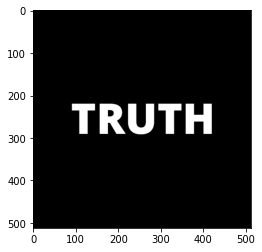

In [18]:
plt.imshow(image, cmap='gray')
plt.show()

In [98]:
# Apply sobel filter along x direction
sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)

# Apply sobel filter along y direction
sobely = cv2.Sobel(image,cv2.CV_32F, 0, 1)

Text(0.5, 1.0, 'Sobel Y Gradients')

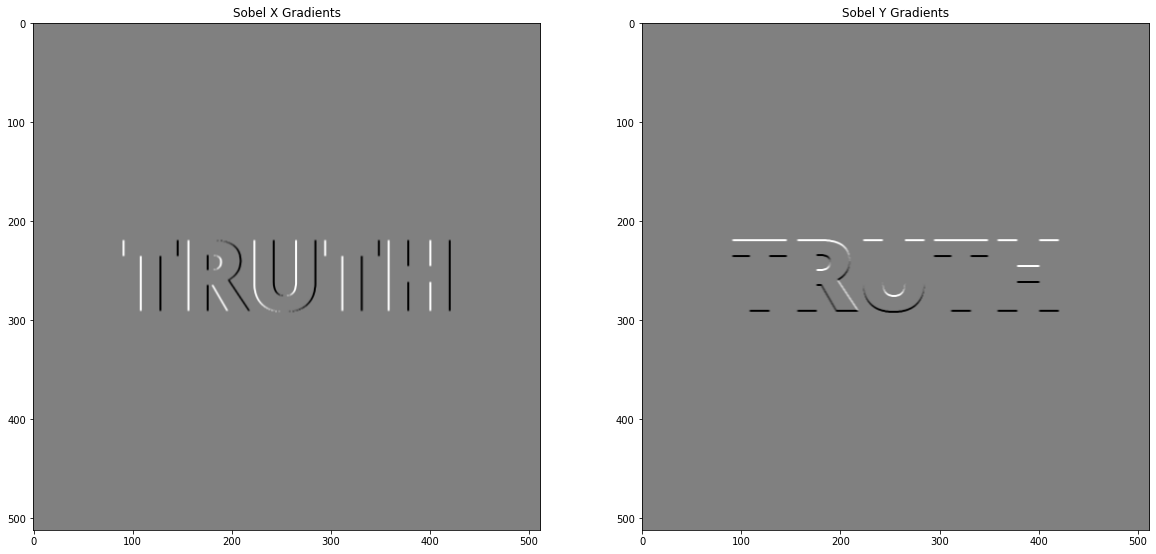

In [99]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(sobelx, cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(122);plt.imshow(sobely, cmap='gray');plt.title("Sobel Y Gradients")

In [100]:
print(sobelx[0][0])
print(np.min(sobelx))
print(np.max(sobelx))
print(np.min(sobely))
print(np.max(sobely))

0.0
-1020.0
1020.0
-1020.0
1020.0


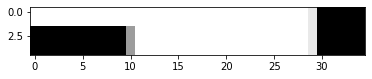

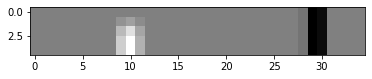

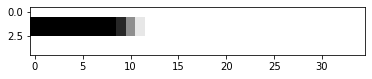

In [101]:
plt.imshow(image[260:265, 390:425], cmap='gray')
plt.show()
plt.imshow(sobelx[260:265, 390:425], cmap='gray')
plt.show()
plt.imshow(sobely[260:265, 390:425], cmap='gray')
plt.show()

For display purposes, the image is normalized by scaling and shifting so that all pixel values lie between 0 and 1.

Text(0.5, 1.0, 'Sobel Y Gradients')

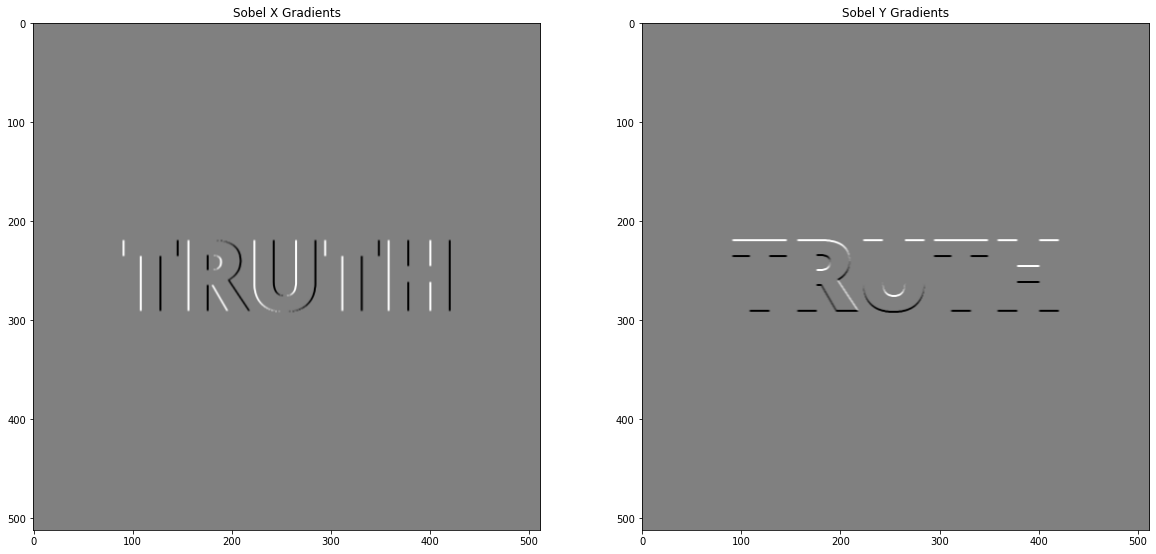

In [102]:
# Normalize image for display
cv2.normalize(sobelx, 
                dst = sobelx, 
                alpha = 0, # min value
                beta = 1,  # max value
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)

cv2.normalize(sobely, 
                dst = sobely, 
                alpha = 0, # min value
                beta = 1,  # max value
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(sobelx, cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(122);plt.imshow(sobely, cmap='gray');plt.title("Sobel Y Gradients")

In [103]:
print(sobelx[0][0])
print(np.min(sobelx))
print(np.max(sobelx))
print(np.min(sobely))
print(np.max(sobely))

0.5
-2.9569492e-08
1.0
-2.9569492e-08
1.0


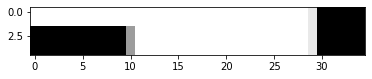

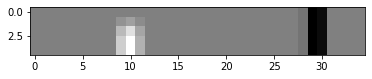

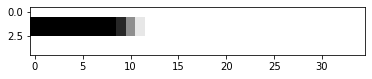

In [104]:
plt.imshow(image[260:265, 390:425], cmap='gray')
plt.show()
plt.imshow(sobelx[260:265, 390:425], cmap='gray')
plt.show()
plt.imshow(sobely[260:265, 390:425], cmap='gray')
plt.show()

[[255 255 255]
 [  0   0   0]
 [  0   0   0]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-1020. -1020. -1020.]
 [-1020. -1020. -1020.]
 [    0.     0.     0.]]


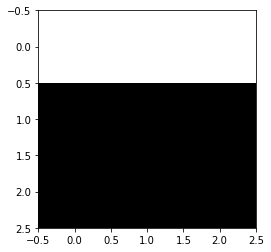

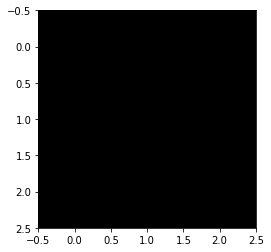

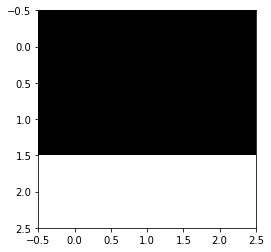

In [106]:
sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_32F, 0, 1)

print(image[261:264, 390:393])
print(sobelx[261:264, 390:393])
print(sobely[261:264, 390:393])
plt.imshow(image[261:264, 390:393], cmap='gray')
plt.show()
plt.imshow(sobelx[261:264, 390:393], cmap='gray')
plt.show()
plt.imshow(sobely[261:264, 390:393], cmap='gray')
plt.show()

[[255 255 255]
 [156 255 255]
 [156 255 255]]
[[ 255.   99.    0.]
 [ 765.  297.    0.]
 [1020.  396.    0.]]
[[-453.  -99.    0.]
 [-453.  -99.    0.]
 [   0.    0.    0.]]


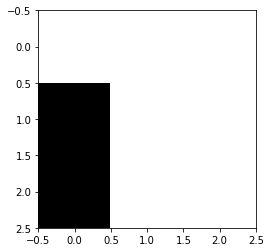

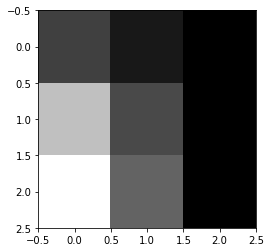

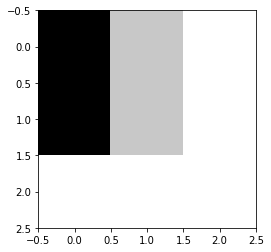

In [108]:
sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_32F, 0, 1)

print(image[261:264, 400:403])
print(sobelx[261:264, 400:403])
print(sobely[261:264, 400:403])
plt.imshow(image[261:264, 400:403], cmap='gray')
plt.show()
plt.imshow(sobelx[261:264, 400:403], cmap='gray')
plt.show()
plt.imshow(sobely[261:264, 400:403], cmap='gray')
plt.show()

In [112]:
xl = -255-2*156-156
xr = 255+2*255+255
print(xl, xr, xl+xr)

-723 1020 297


In [207]:
a = np.arctan2(-99, 297)
print(a)
print(a*2)
print(np.degrees(a))
print(np.degrees(a*2))   

-0.3217505543966422
-0.6435011087932844
-18.43494882292201
-36.86989764584402


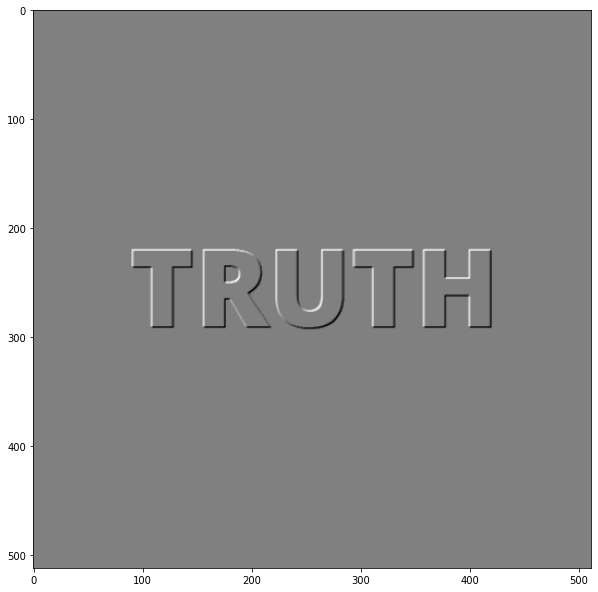

In [121]:
plt.figure(figsize=(10, 15))
plt.imshow(sobelx+sobely, cmap='gray')
plt.show()

[[255 255 255]
 [156 255 255]
 [156 255 255]]
[[255.  99.   0.]
 [255.  99.   0.]
 [  0.   0.   0.]]


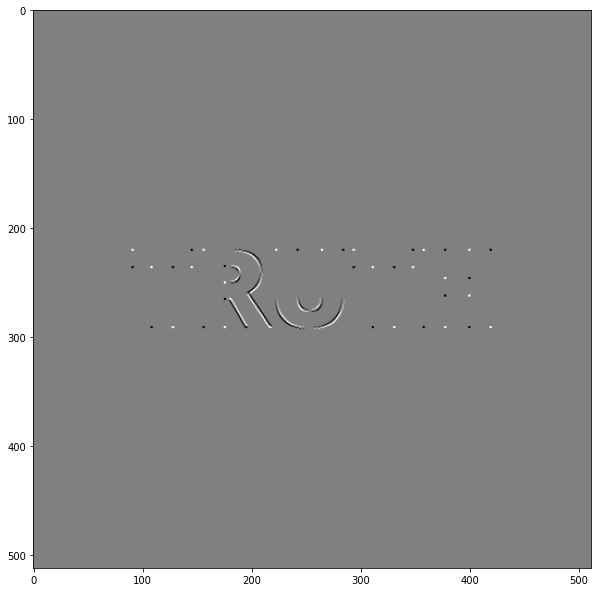

In [118]:
sobel = cv2.Sobel(image, cv2.CV_32F, 1, 1)

print(image[261:264, 400:403])
print(sobel[261:264, 400:403])
plt.figure(figsize=(10, 15))
plt.imshow(sobel, cmap="gray")
plt.show()